In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


In [4]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
tqdm.pandas()

import logging
logging.getLogger("transformers").setLevel(logging.ERROR)
logging.getLogger("transformers.configuration_utils").setLevel(logging.WARNING)
logging.getLogger("transformers.modeling_utils").setLevel(logging.WARNING)
logging.getLogger("transformers.tokenization_utils").setLevel(logging.WARNING)

In [4]:
train = pd.read_csv('data/BBB_train.csv', dtype={'Drug': str})
val = pd.read_csv('data/BBB_valid.csv', dtype={'Drug': str})
test = pd.read_csv('data/BBB_test.csv', dtype={'Drug': str})
drugbank_smiles = pd.read_csv('data/drugbank_smiles.csv', dtype={'smiles': str})
drugbank_smiles.rename(columns={'smiles': 'Drug'}, inplace=True)

datasets = [train, val, test, drugbank_smiles]

In [5]:
train.head()

,Drug,Y
0,CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1,1
1,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,1
2,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...,1
3,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3C(C(=...,1
4,CN(C)[C@@H]1C(=O)/C(=C(/O)NCN2CCCC2)C(=O)[C@@]...,1


In [5]:
checkpoints = ['DeepChem/ChemBERTa-10M-MLM',
               'DeepChem/ChemBERTa-10M-MTR',
               'DeepChem/ChemBERTa-77M-MLM',
               'DeepChem/ChemBERTa-77M-MTR']

In [9]:
def get_embeddings(model, tokenizer, smile):
  inputs = tokenizer(smile, return_tensors="pt", truncation=True, padding=True)
  with torch.no_grad():
      outputs = model(**inputs)
  return outputs.last_hidden_state[:,0,:]

for checkpoint in checkpoints:
  print(f"\n{checkpoint}:\n")
  model = AutoModel.from_pretrained(checkpoint)
  tokenizer = AutoTokenizer.from_pretrained(checkpoint)
  for dataset in datasets:
    dataset[checkpoint] = dataset['Drug'].progress_apply(lambda smile: get_embeddings(model, tokenizer, smile))


DeepChem/ChemBERTa-10M-MLM:



Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-10M-MLM and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 8288/8288 [01:24<00:00, 97.70it/s]



DeepChem/ChemBERTa-10M-MTR:



config.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-10M-MTR and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

100%|██████████| 8288/8288 [01:26<00:00, 96.09it/s]



DeepChem/ChemBERTa-77M-MLM:



config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/13.7M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MLM and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

100%|██████████| 8288/8288 [01:24<00:00, 97.54it/s]



DeepChem/ChemBERTa-77M-MTR:



config.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

100%|██████████| 8288/8288 [01:24<00:00, 98.01it/s]


In [10]:
for dataset in datasets:
  for checkpoint in checkpoints:
    dataset[checkpoint] = dataset[checkpoint].apply(lambda x: x.detach().numpy())

train.to_pickle('data/BBB_train_embeddings.pkl')
val.to_pickle('data/BBB_valid_embeddings.pkl')
test.to_pickle('data/BBB_test_embeddings.pkl')
drugbank_smiles.to_pickle('data/drugbank_smiles_embeddings.pkl')

In [7]:
train = pd.read_pickle('data/BBB_train_embeddings.pkl')
val = pd.read_pickle('data/BBB_valid_embeddings.pkl')
test = pd.read_pickle('data/BBB_test_embeddings.pkl')
drugbank_smiles = pd.read_pickle('data/drugbank_smiles_embeddings.pkl')

datasets = [train, val, test, drugbank_smiles]

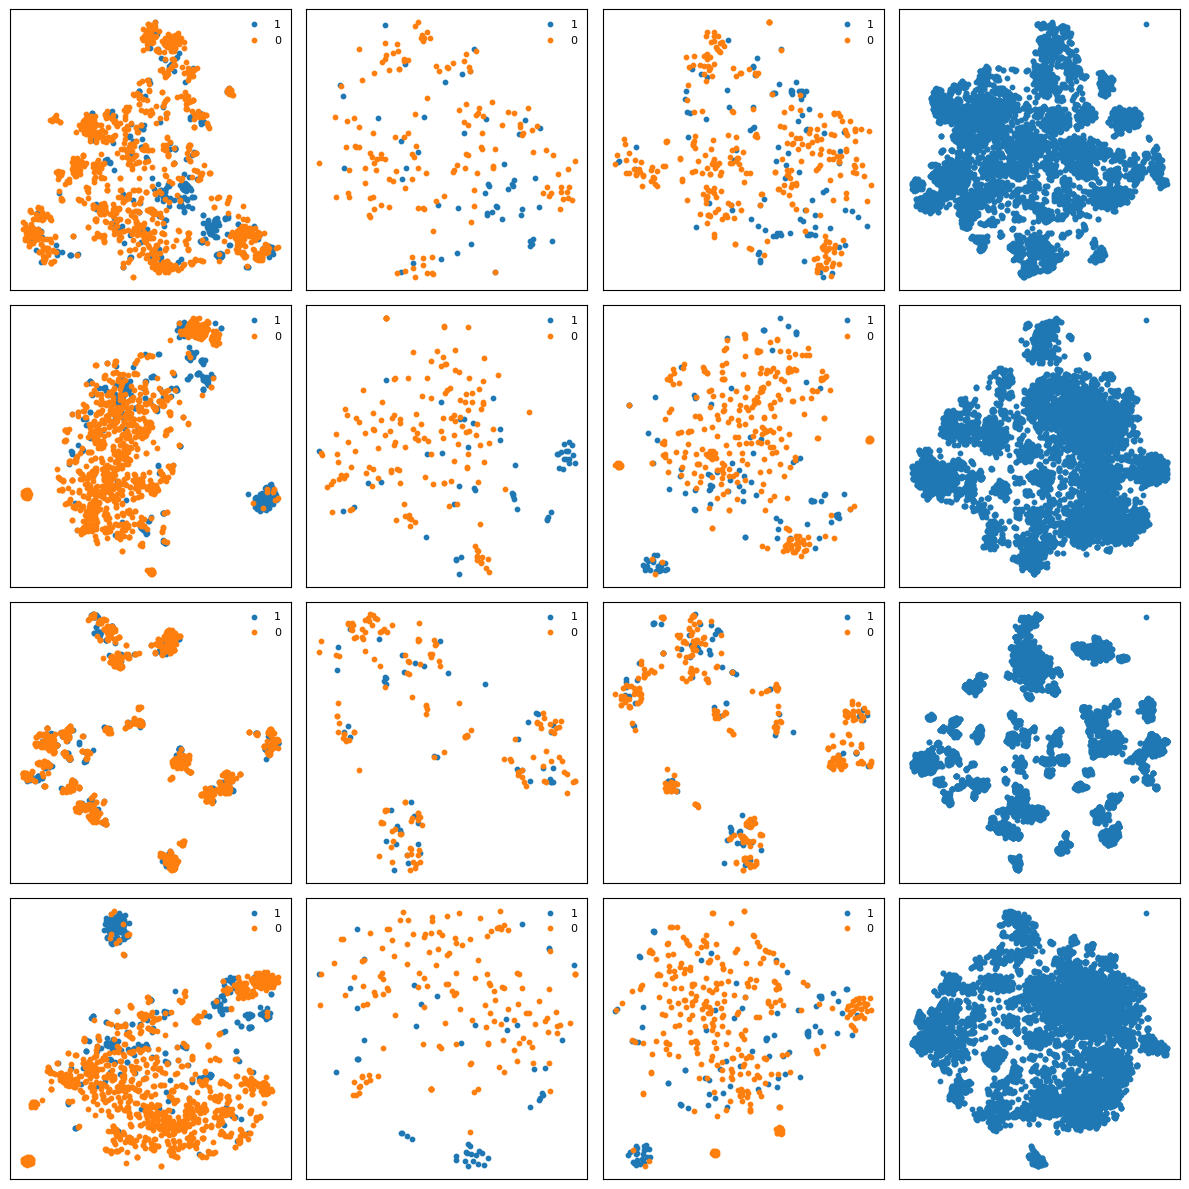

In [10]:
def tsne_plot_embeddings(ax, embeddings, labels, class_names, title=None):
    latent_space_tsne = TSNE(2, verbose=False, n_iter=2000, metric="cosine", perplexity=50, learning_rate=500)
    xa_tsne = latent_space_tsne.fit_transform(embeddings)
    colors = plt.rcParams["axes.prop_cycle"]()

    for class_idx in range(len(class_names)):
        c = next(colors)["color"]
        ax.scatter(xa_tsne[:,0][labels==class_idx], xa_tsne[:,1][labels==class_idx], color=c, label=class_names[class_idx], s=10)

    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.legend(loc='best', fontsize=8, frameon=False)

fig, axs = plt.subplots(len(checkpoints), len(datasets), figsize=(12, 12))

for i, checkpoint in enumerate(checkpoints):
    for j, dataset in enumerate(datasets):
        embeddings = dataset[checkpoint].values
        try:
          labels = dataset['Y'].values
          class_names = dataset['Y'].unique()
        except:
          labels = np.zeros(len(embeddings))
          class_names = " "

        embeddings = np.vstack(embeddings)

        tsne_plot_embeddings(axs[i, j], embeddings, labels, class_names)

plt.tight_layout()
plt.savefig("plots/tsne_chemberta_embeddings.png")
plt.show()